In [1]:
from keras.models import Model
from keras import layers
from keras import Input

max_words = 10000 
num_income_groups = 10

Using TensorFlow backend.


In [2]:
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(max_words, 256)(posts_input)

In [3]:
x = layers.Conv1D(filters=128, kernel_size=5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=2, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

In [4]:
pred_age = layers.Dense(1, name='age')(x)

pred_income = layers.Dense(num_income_groups, activation='softmax',
                          name='income')(x)

pred_gender = layers.Dense(1, activation='sigmoid', name='gender')(x)

In [7]:
model = Model(inputs=posts_input, outputs=[pred_age, pred_income, pred_gender])

In [10]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 256)    2560000     posts[0][0]                      
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    163968      embedding_1[0][0]                
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, None, 128)    0           conv1d_1[0][0]                   
____________________________________________________________________________________________

In [11]:
model.compile(optimizer='rmsprop',
             loss={'age':'mse',
                  'income':'categorical_crossentropy',
                  'gender':'binary_crossentropy'},
             loss_weights={'age':0.25,
                          'income':1.0,
                          'gender':10.0},
             metrics=['accuracy']
             )
# model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

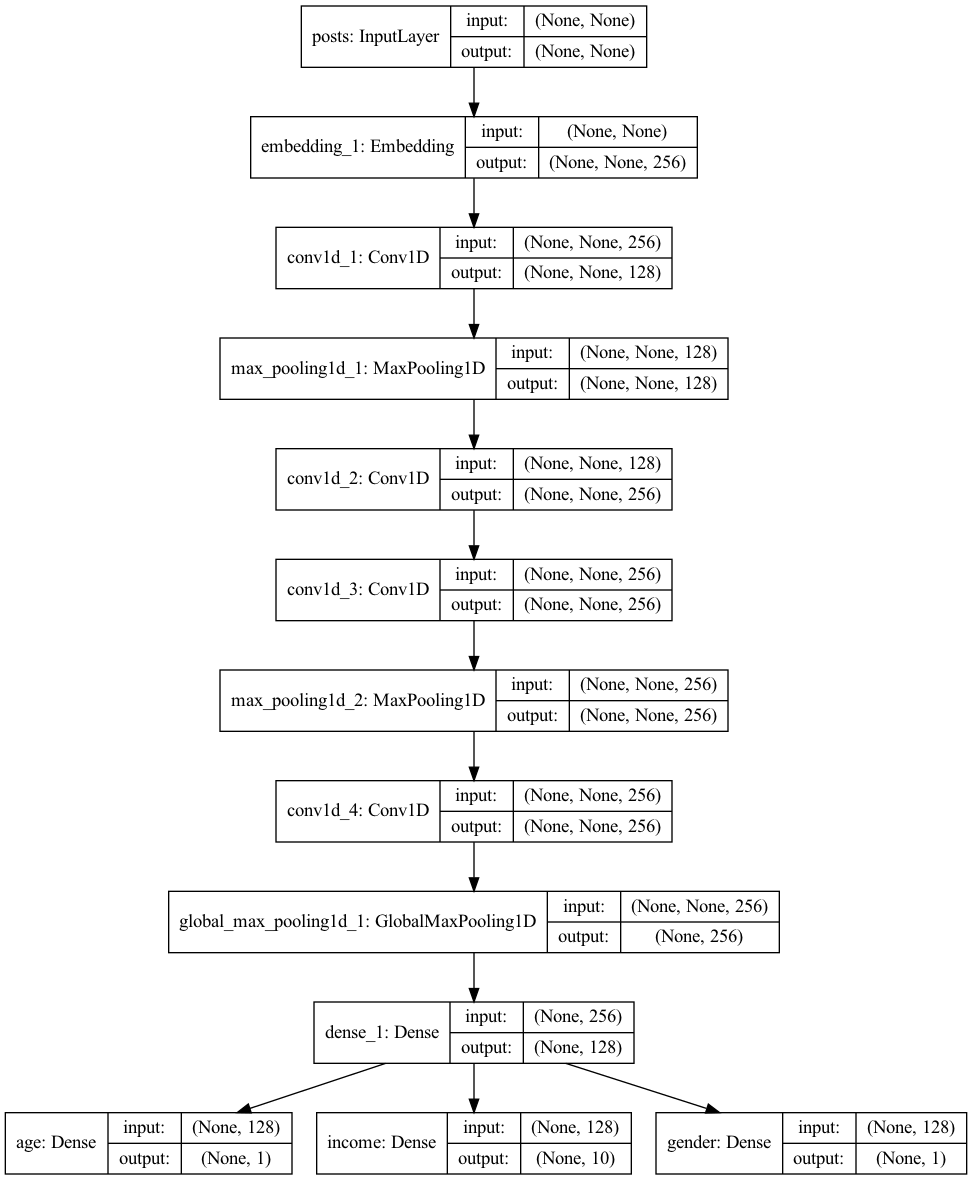

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [20]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples = 1000
max_len = 100

posts = np.random.randint(low=0, high=max_words, size=(num_samples, max_len))

target_age = np.random.randint(low=0, high=100, size=num_samples)
target_income = np.random.randint(low=0, high=10, size=num_samples)
target_gender = np.random.randint(low=0, high=2, size=num_samples)

target_income = to_categorical(target_income)

In [21]:
print(posts.shape)
posts

(1000, 100)


array([[5558, 8185,  445, ..., 5707, 3747, 7471],
       [3922, 2931, 6802, ..., 3513, 7744, 8346],
       [6809, 7237, 6561, ..., 6036, 1194, 7608],
       ...,
       [9719, 6316, 8364, ..., 8777, 9402, 5124],
       [3784,   21, 5980, ..., 7007, 6412,  477],
       [4086, 1982, 6633, ..., 8051, 3339, 5346]])

In [ ]:
model.fit(posts, [target_age, target_income, target_gender],
         epochs=3, batch_size=64)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3


In [ ]:
result = model.predict(posts)

In [ ]:
print('print('연령 예측 결과: \n', result[0][:10])')

In [ ]:
print('print('소득 예측 결과: \n', result[1][:10])')

In [ ]:
print('print('성별 예측 결과: \n', result[2][:10])')